#حسین سیفی
#810100386

#Part 1

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ML_HW4_datasets/Q7-Part1.csv"
df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
X = pd.DataFrame()
X['Level'] = df['Level']
X['Level2'] = df['Level']
y = df['Salary']

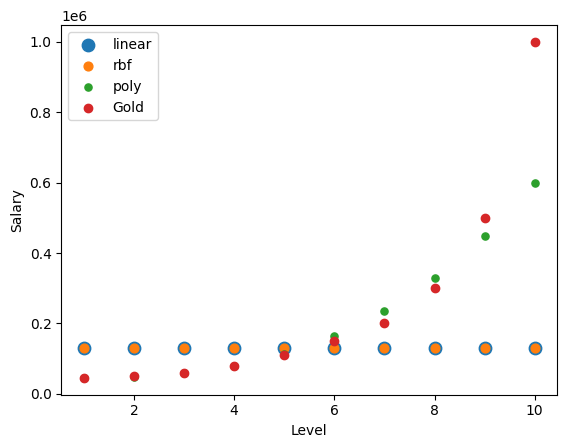

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
pred = list()
for k in ['linear', 'rbf', 'poly']:
  model = SVR(kernel=k, gamma='auto').fit(X, y)
  pred.append(model.predict(X))

i = 1
fig = plt.figure()
ax = fig.add_subplot()
for k in ['linear', 'rbf', 'poly']:
  plt.scatter(X['Level'], pred[i-1], label=k, s = 1/i*80)
  i += 1
plt.scatter(X['Level'], y, label="Gold")
ax.set_xlabel('Level')
ax.set_ylabel('Salary')
plt.legend()

#Part 2

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ML_HW4_datasets/Hotel"
train_df = pd.read_csv(path + "/H1.csv")
test_df = pd.read_csv(path + "/H2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.svm import SVC, SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
strcols = list()
for c in train_df.columns:
  if isinstance(train_df.iloc[0][c], str):
      strcols.append(c)
for c in strcols:
  train_df[c] = train_df[c].astype('category').cat.codes
  test_df[c] = test_df[c].astype('category').cat.codes

In [ ]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [ ]:
X_train = train_df.loc[:, train_df.columns != 'ADR']
X_test = test_df.loc[:, test_df.columns != 'ADR']
y_train = train_df[['ADR']]
y_test = test_df[['ADR']]

In [ ]:
model = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [ ]:
model.score(X_train, y_train)

0.6078230003042131

In [ ]:
pred1 = model.predict(X_train)

Text(0, 0.5, 'ADR')

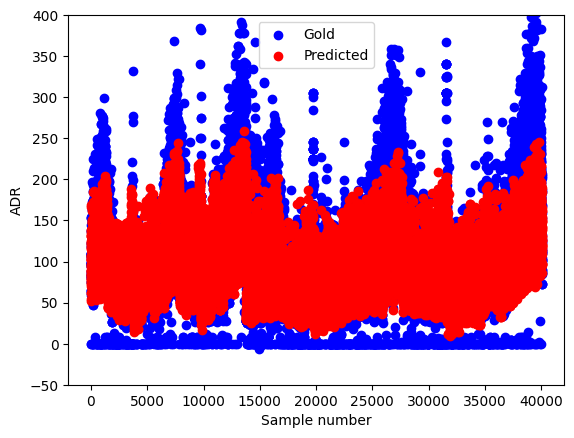

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(list(range(pred1.shape[0])), y_train, color='b', label="Gold")
plt.scatter(list(range(pred1.shape[0])), pred1, color='r', label="Predicted")
plt.ylim((-50,400))
plt.legend()
ax.set_xlabel('Sample number')
ax.set_ylabel('ADR')

In [ ]:
mae = round(mean_absolute_error(y_train, pred1), 2)
mse = round(mean_squared_error(y_train, pred1), 2)
r2 = round(r2_score(y_train, pred1), 2)
print("Train MAE: " + str(mae))
print("Train MSE: " + str(mse))
print("Train RMSE: " + str(mse**0.5))
print("Train R2: " + str(r2))

Train MAE: 25.93
Train MSE: 1480.5
Train RMSE: 38.47726601514198
Train R2: 0.61


In [ ]:
pred = model.predict(X_test)

Text(0, 0.5, 'ADR')

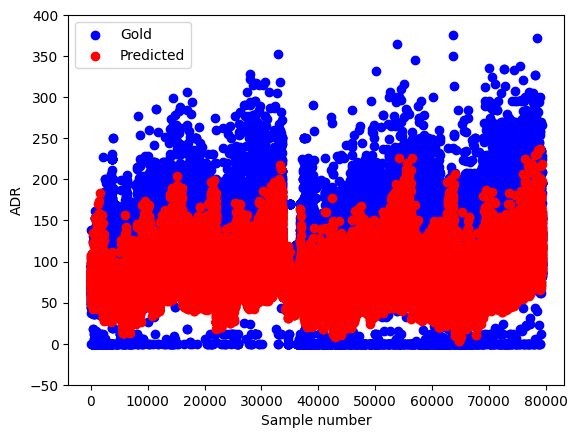

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(list(range(pred.shape[0])), y_test, color='b', label="Gold")
plt.scatter(list(range(pred.shape[0])), pred, color='r', label="Predicted")
plt.ylim((-50,400))
plt.legend()
ax.set_xlabel('Sample number')
ax.set_ylabel('ADR')

In [ ]:
result_df = pd.DataFrame()
result_df['Real'] = y_test
result_df['Predicted'] = pred
result_df['Difference'] = [y_test.iloc[i]['ADR']-pred[i] for i in range(pred.shape[0])]
result_df.to_csv(path + '/result.csv')

In [ ]:
mae = round(mean_absolute_error(y_test, pred), 2)
mse = round(mean_squared_error(y_test, pred), 2)
r2 = round(r2_score(y_test, pred), 2)
print("Test MAE: " + str(mae))
print("Test MSE: " + str(mse))
print("Test RMSE: " + str(mse**0.5))
print("Test R2: " + str(r2))

Test MAE: 36.32
Test MSE: 2413.6
Test RMSE: 49.12840319000812
Test R2: -0.27


In [ ]:
print("Min: " + str(min(y_test['ADR'])))
print("Max: " + str(max(y_test['ADR'])))

Min: 0.0
Max: 5400.0
